#  Systematic Review 


I'm hoping this can help you guys conduct a systematic review for your paper. The only place you need to change anything is the cell that says "this is where you edit stuff", enter the keywords and combinations of keywords. The code will automatically find all relevant papers and plot the # of papers over time, the country the papers come from (specifically the country of the first authors institution), and the journals the papers are publsihed in

Press shift+ enter to run an individual cell or click run at the top to run all cells


# This cell installs the relevant libraries - dont worry about it

In [7]:
#Install and import pyscopus plug-in and other usefull libraries

import sys
!{sys.executable} -m pip install pyscopus
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
import pyscopus
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
pd.set_option('display.max_colwidth', -1) # ensure full values can be seen
pd.options.display.float_format = '{:.2f}'.format





Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -

## This cell imports the scopus key, you can use mine but if you want to do something like this in the future you can get one at the listed link - dont worry about this cell

In [8]:
#input scopus API key (get one here https://dev.elsevier.com/)
from pyscopus import Scopus
key='307b8527a8742c8f1d5dc0d4699deda7' # you need to enter your own scopus API key here (no spaces)
scopus= Scopus(key);

## This cell has the function that creates the graphs, they are kind of ugly right now but we can fix them later if you want - dont worry about this cell

In [9]:
#This function is where all the analysis is conducted, It produces 2 charts and 3 tables. 
# Chart 1 The papers published by year and corresponding table
# Chart 2 The papers publihed by country and corresponding table
# Table 3 The papers published by Journal
# The function can be used on any dataset produced by pyscopus


def Systematic_Review(Search_Dataset): # Search_Dataset set will be the results from pyscopus
    
    # Extract publish year and journal articles were published in  
    Search_Dataset=mainDataSet
    cover_date=Search_Dataset['cover_date']
    year=cover_date.str.split('-',n=1, expand=True)[0].astype(int)
    publisherData=Search_Dataset['publication_name']
    
    # The affiliation column has a large amount of information about 
    # where the paper came from, university, city, etc. in this case we only want information about the 
    # Country of the first Authors institution, these lines extrate that data and save it as CD
    
    location=Search_Dataset['affiliation'].astype(str)
    country=location.str.split("country",n=1,expand=True)[1]
    country=country.str.split('\'''',n=3,expand=True)[2]
    CD=country.dropna() #removing any areas which dont have country data
    
    # create a table showing how many papers were published each year
    pub_count=year.value_counts().astype(int) #Count of how many publications were published each year
    pub_Perc=(pub_count/len(year)*100) # percentage of publications published in this year
    Year_published = np.transpose(np.array(pub_Perc.index)).astype(int)
    pub_table=pd.DataFrame(np.c_[Year_published,pub_count,pub_Perc],columns=["Year","Count","Percent"])
    pub_table=pub_table.sort_values('Year',ascending=False)
    
    # plot histogram of publications by year
    plt.title('Publications by Year')
    plt.xlabel('Year')
    plt.ylabel('# of publications')
    
    # Ensure that each year has its own Bin, starting from 2011 until the current year - note if the search
    # timeframe is changed these lines must also be
    bins=np.linspace(min(year),(max(year)+1),(max(year)-min(year)+2)) 
    plt.xticks(bins)
    hist=plt.hist(year,bins=bins ,rwidth=0.5)
    plt.xlim([min(year),(max(year)+1)])
    plt.show()
    
    display(pub_table)
    
     #plot the number of publications coming from different countries
    plt.figure(figsize=(11,11))
    plt.title('Publications by Country')
    plt.xlabel('Country of First Author institution')
    plt.ylabel('# of publications')
    Country_plot=pd.Series(CD).value_counts().plot(kind='bar')
    plt.show()
    
    #display(CD_table)
    
    # Create a table with the papers published in each Journal
    
    print('Journals where work was published: ')
    print('')
    JCount=publisherData.value_counts()
    JPerc=publisherData.value_counts()/len(CD)*100
    JIndex=np.transpose(np.array(JCount.index))
    JournalTable=pd.DataFrame(np.c_[JIndex,JCount,JPerc], columns=['Journal Name',"Count","Percent"])
    display(JournalTable)


## This is where you will edit stuff!! 

You can set the key words and combinations of key words, you can also search in the abstract or the paper text itself 

all the specific detalis are here https://dev.elsevier.com/tips/ScopusSearchTips.htm 

Right now I have it set up to search for any racism related key words AND medicine related keywords

Lets break down the structure of the search just for ease of use

the line says:

mainDataSet = scopus.search("Key(<font color='green'>Race</font> OR<font color='green'> Racism</font> OR<font color='green'> Diversity</font> OR <font color='green'>Discrimination</font>) AND Key(<font color='green'>Medicine</font>  OR <font color='green'>Medical Education</font>  OR <font color='green'>Medical School</font> ) ", count=<font color='green'>1000</font> , view='STANDARD')


The stuff in green is all you will want to change. The first set identifies any papers with any of those words in the key words. Then after the "AND" it identifies any papers which also have the medicine related terms in the key words.

If you want more keywords just add OR and the word within the parenthesis. If you want another set of terms type AND Key( ...)

The numbers in green after count are the number of papers which will be found. I have limited the number of papers to 1000, that is just to make things go faster feel free to change it.


edit the key words and then run the code, this is the only place you need to change stuff

The cell below where it says display(mainDataSet) prints all the papers along with some relevant information, it is truncated so that you don't have to scroll through all the papers. 

If you want to see all the papers delete the # in front of the line that says max_rows



In [16]:
# This is where the search for papers occures, details on the Keywords used here are in the text
# Details about the search syntax detailed here (https://dev.elsevier.com/tips/ScopusSearchTips.htm)

mainDataSet = scopus.search("Key(Race OR Racism OR Diversity OR Discrimination) AND Key(Medicine OR Medical Education OR Medical School) ", count=1000, view='STANDARD')

In [17]:
#pd.set_option('display.max_columns', None) # delete the # at the beginning of the line to see all columns
#pd.set_option('display.max_rows', None)  # delete the # at the beginning of the line to see all rows
display(mainDataSet) 


,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text
0,85099335249,Women Neurosurgeons in Academic and Other Leadership Positions in the United States,World Neurosurgery,18788750,None,18788769,147,80-88,2021-03-01,10.1016/j.wneu.2020.12.069,0,"[{'name': 'Icahn School of Medicine at Mount Sinai', 'city': 'New York', 'country': 'United States'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S187887502032636X
1,85099220516,“It was as if I wasn't there” – Experiences of everyday racism in a Swedish medical school,Social Science and Medicine,02779536,None,18735347,270,None,2021-02-01,10.1016/j.socscimed.2021.113678,0,"[{'name': 'Umeå Universitet', 'city': 'Umea', 'country': 'Sweden'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0277953621000101
2,85099428003,Ethnic and racial diversity in academic physical medicine and rehabilitation compared with all other medical specialties,American Journal of Physical Medicine and Rehabilitation,08949115,None,15377385,100,S12-S16,2021-02-01,10.1097/PHM.0000000000001486,1,"[{'name': 'University of Texas Health Science Center at Houston', 'city': 'Houston', 'country': 'United States'}]",Journal,Article,[],None
3,85090305301,"Educator perceptions on teaching Indigenous health: Racism, privilege and self-reflexivity",Medical Education,03080110,None,13652923,55,213-221,2021-02-01,10.1111/medu.14344,0,"[{'name': 'Monash University', 'city': 'Melbourne', 'country': 'Australia'}]",Journal,Article,[],None
4,85091802346,"Equity, Diversity, and Inclusion in Academic American Surgery Faculty: An Elusive Dream",Journal of Surgical Research,00224804,None,10958673,258,179-186,2021-02-01,10.1016/j.jss.2020.08.069,0,"[{'name': 'The University of British Columbia', 'city': 'Vancouver', 'country': 'Canada'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S0022480420306326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,80055106986,"The use of a single von Willebrand factor-containing, plasma-derived FVIII product in hemophilia A immune tolerance induction: The US experience",Journal of Thrombosis and Haemostasis,15387933,None,15387836,9,2229-2234,2011-11-01,10.1111/j.1538-7836.2011.04493.x,36,"[{'name': 'Children's Hospitals and Clinics of Minnesota', 'city': 'Minneapolis', 'country': 'United States'}]",Journal,Article,[],None
996,84855206509,Living with epilepsy,Australian Journal of Pharmacy,03118002,None,None,92,30,2011-11-01,None,0,None,Journal,Short Survey,[],None
997,81855166624,International skeletal society outreach in Colombia,Skeletal Radiology,03642348,None,14322161,40,1245-1247,2011-10-01,10.1007/s00256-011-1136-0,0,"[{'name': 'NYU Langone Orthopedic Hospital', 'city': 'New York', 'country': 'United States'}]",Journal,Review,[],None
998,80054106042,Lower extremity vascular injuries: Increased mortality for minorities and the uninsured?,Surgery,00396060,None,15327361,150,656-664,2011-10-01,10.1016/j.surg.2011.07.052,11,"[{'name': 'Northwestern University Feinberg School of Medicine', 'city': 'Chicago', 'country': 'United States'}]",Journal,Article,[],https://api.elsevier.com/content/article/eid/1-s2.0-S003960601100403X


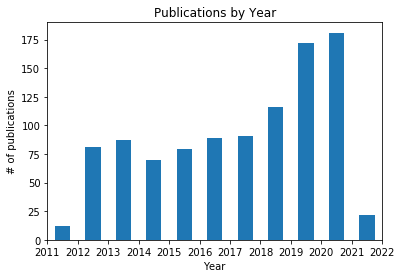

,Year,Count,Percent
9,2021.00,22.00,2.20
0,2020.00,181.00,18.10
1,2019.00,172.00,17.20
2,2018.00,116.00,11.60
3,2017.00,91.00,9.10
4,2016.00,89.00,8.90
7,2015.00,79.00,7.90
8,2014.00,70.00,7.00
5,2013.00,87.00,8.70
6,2012.00,81.00,8.10


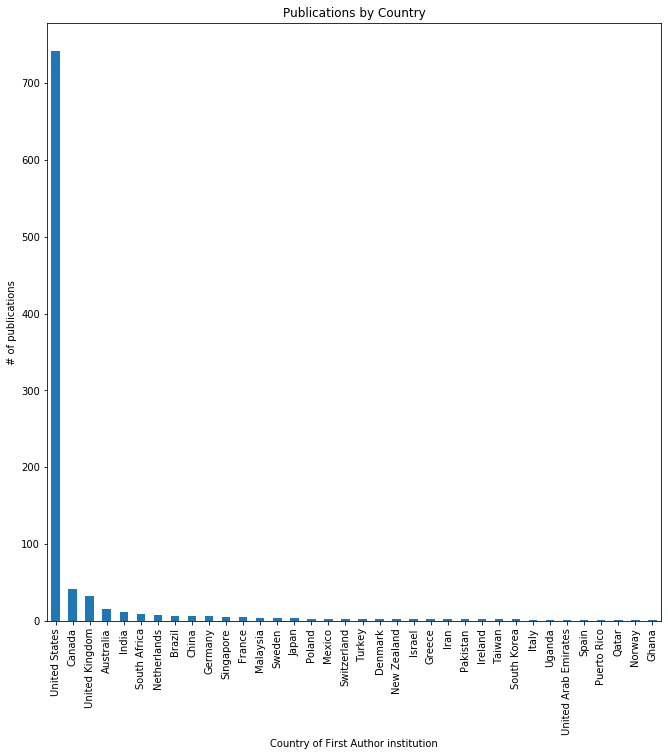

Journals where work was published: 



,Journal Name,Count,Percent
0,Academic Medicine,27,2.87
1,Pediatrics,26,2.77
2,Journal of the National Medical Association,23,2.45
3,BMC Medical Education,22,2.34
4,JAMA - Journal of the American Medical Association,21,2.23
...,...,...,...
432,Duzce Medical Journal,1,0.11
433,Journal of Cancer Education,1,0.11
434,JK Science,1,0.11
435,Perspectives on Medical Education,1,0.11


In [18]:
Systematic_Review(mainDataSet)

## Background info

If you use this and want to give credit you can cite this guy

The analysis was conducted using the Pyscopus plugin for python (http://zhiyzuo.github.io/python-scopus/). Pyscopus is a wrapper for the scopus API; the world’s largest database of peer reviewed literature.

